In [324]:
import numpy as np
import cv2
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

In [325]:
img = cv2.imread('./test_images/sharapova1.jpg')
img.shape

(555, 700, 3)

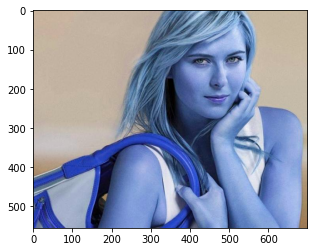

In [326]:
plt.imshow(img)

In [327]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray.shape

(555, 700)

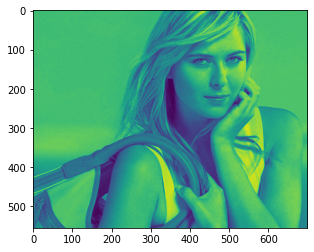

In [328]:
plt.imshow(gray)

In [329]:
gray

array([[175, 175, 175, ..., 176, 175, 174],
       [175, 175, 175, ..., 177, 175, 174],
       [175, 175, 175, ..., 177, 176, 174],
       ...,
       [ 84,  87,  88, ..., 113, 113, 113],
       [ 88,  89,  90, ..., 113, 113, 113],
       [ 93,  91,  91, ..., 112, 112, 112]], dtype=uint8)

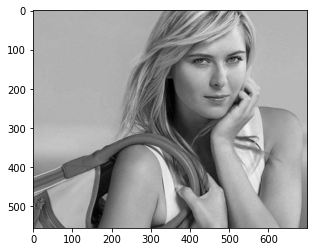

In [330]:
plt.imshow(gray, cmap='gray')

In [331]:
face_cascade = cv2.CascadeClassifier('./opencv/haarCascades/frontfacedetect.xml')
eye_cascade = cv2.CascadeClassifier('./opencv/haarCascades/eye.xml')

faces = face_cascade.detectMultiScale(gray, 1.3, 5)
faces

array([[352,  38, 233, 233]])

In [332]:
(x,y,w,h) = faces[0]
x,y,w,h

(352, 38, 233, 233)

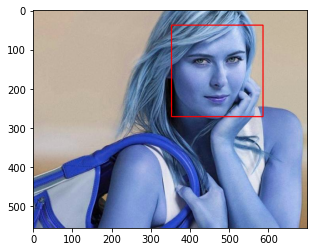

In [308]:
face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
plt.imshow(face_img)

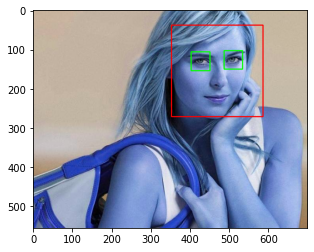

In [333]:
cv2.destroyAllWindows()
for (x,y,w,h) in faces:
    face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = face_img[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)
        

plt.figure()
plt.imshow(face_img, cmap='gray')
plt.show()

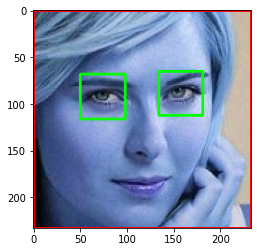

In [334]:
%matplotlib inline
plt.imshow(roi_color, cmap='gray')

In [335]:
def get_cropped_image_if_2_eyes(image_path):
    img = cv2.imread(image_path)
    if img is not None:
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        faces = face_cascade.detectMultiScale(gray, 1.3, 5)
        for (x,y,w,h) in faces:
            roi_gray = gray[y:y+h, x:x+w]
            roi_color = img[y:y+h, x:x+w]
            eyes = eye_cascade.detectMultiScale(roi_gray)
            if len(eyes) >= 2:
                return roi_color
    else:
        print('Empty Frame')
        
    

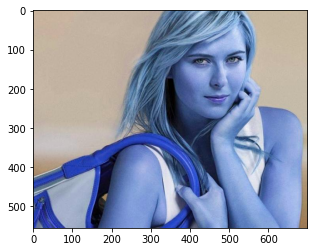

In [336]:
original_image = cv2.imread('./test_images/sharapova1.jpg')
plt.imshow(original_image)

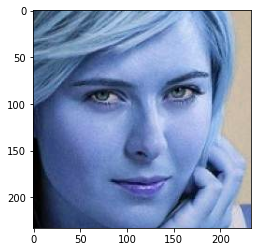

In [337]:
cropped_image = get_cropped_image_if_2_eyes('./test_images/sharapova1.jpg')
plt.imshow(cropped_image)

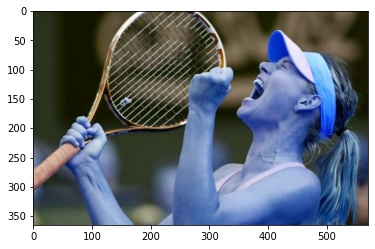

In [338]:
original_image_obstructed = cv2.imread('./test_images/sharapova2.jpg')
plt.imshow(original_image_obstructed)

In [339]:
cropped_image_no_2_eyes = get_cropped_image_if_2_eyes('./test_images/sharapova2.jpg')
print(cropped_image_no_2_eyes)

None


In [340]:
cropped_img = np.array(roi_color)
cropped_img.shape

(233, 233, 3)

In [341]:
import pywt
def w2d(img, mode='haar', level=1):
    imArray = img
    #Datatype conversions
    #convert to grayscale
    imArray = cv2.cvtColor( imArray,cv2.COLOR_RGB2GRAY )
    #convert to float
    imArray =  np.float32(imArray)   
    imArray /= 255;
    # compute coefficients 
    coeffs=pywt.wavedec2(imArray, mode, level=level)

    #Process Coefficients
    coeffs_H=list(coeffs)  
    coeffs_H[0] *= 0;  

    # reconstruction
    imArray_H=pywt.waverec2(coeffs_H, mode);
    imArray_H *= 255;
    imArray_H =  np.uint8(imArray_H)

    return imArray_H

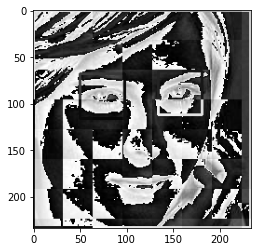

In [342]:
im_har = w2d(cropped_img,'db1',5)
plt.imshow(im_har, cmap='gray')

In [343]:
path_to_data = './dataset/'
path_to_cr_data = './dataset/cropped/'

In [344]:
import os
img_dirs = []
for entry in os.scandir(path_to_data):
    if entry.is_dir():
        img_dirs.append(entry.path)

In [345]:
img_dirs

['./dataset/cropped',
 './dataset/Lionel_Messi',
 './dataset/Maria_Sharapova',
 './dataset/Roger_Federer',
 './dataset/Serena_Williams',
 './dataset/Virat_Kohli']

In [346]:
import shutil
if os.path.exists(path_to_cr_data):
    shutil.rmtree(path_to_cr_data)
os.mkdir(path_to_cr_data)

In [347]:
cropped_image_dirs = []
celebrity_file_name_dict = {}

for img_dir in img_dirs:
    count = 1
    celebrity_name = img_dir.split('/')[-1]
    print(celebrity_name)

    celebrity_file_name_dict[celebrity_name] = []

    for entry in os.scandir(img_dir):
        roi_color = get_cropped_image_if_2_eyes(entry.path)
        if roi_color is not None:
            cropped_folder = path_to_cr_data + celebrity_name
            if not os.path.exists(cropped_folder):
                os.makedirs(cropped_folder)
                cropped_image_dirs.append(cropped_folder)
                print("Generating Cropped Images In Folder")

            cropped_file_name = celebrity_name + str(count) + '.png'
            cropped_file_path = cropped_folder + '/' + cropped_file_name

            cv2.imwrite(cropped_file_path, roi_color)
            celebrity_file_name_dict[celebrity_name].append(cropped_file_path)
            count += 1

cropped
Lionel_Messi
Generating Cropped Images In Folder
Empty Frame
Empty Frame
Empty Frame
Empty Frame
Empty Frame
Empty Frame
Empty Frame
Maria_Sharapova
Generating Cropped Images In Folder
Empty Frame
Empty Frame
Empty Frame
Empty Frame
Roger_Federer
Generating Cropped Images In Folder
Empty Frame
Empty Frame
Empty Frame
Empty Frame
Serena_Williams
Generating Cropped Images In Folder
Virat_Kohli
Generating Cropped Images In Folder
Empty Frame
Empty Frame
Empty Frame
Empty Frame
Empty Frame
Empty Frame


### Manually Delete the unwanted cropped images and then run below codes

In [400]:
del celebrity_file_name_dict['cropped']

In [401]:
class_dict = {}
count = 0
for celebrity_name in celebrity_file_name_dict.keys():
    class_dict[celebrity_name] = count
    count = count +1
class_dict

{'Lionel_Messi': 0,
 'Maria_Sharapova': 1,
 'Roger_Federer': 2,
 'Serena_Williams': 3,
 'Virat_Kohli': 4}

In [413]:
empty_frames = 0
X, y = [], []
for celebrity_name, training_files in celebrity_file_name_dict.items():
    for training_image in training_files:
        img = cv2.imread(training_image)
        if img is not None:
            scalled_raw_img = cv2.resize(img, (32, 32))
            img_har = w2d(img,'db1',5)
            scalled_img_har = cv2.resize(img_har, (32, 32))
            combined_img = np.vstack((scalled_raw_img.reshape(32*32*3,1),scalled_img_har.reshape(32*32,1)))
            X.append(combined_img)
            y.append(class_dict[celebrity_name])
        else:
            empty_frames += 1
print("Empty frames :",empty_frames)

Empty frames : 49


In [414]:
len(X)

285

In [415]:
len(X[0])

4096

In [416]:
32*32*3 + 32*32

4096

In [417]:
X[0]

array([[ 5],
       [ 7],
       [12],
       ...,
       [17],
       [ 6],
       [ 3]], dtype=uint8)

In [418]:
y[0]

0

In [419]:
X = np.array(X).reshape(len(X),4096).astype(float)
X.shape

(285, 4096)

In [420]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

In [421]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

pipe = Pipeline([('scaler', StandardScaler()), ('svc', SVC(kernel='rbf', C=10))])
pipe.fit(X_train, y_train)
pipe.score(X_test, y_test)

0.8421052631578947

In [422]:
print(classification_report(y_test, pipe.predict(X_test)))

              precision    recall  f1-score   support

           0       0.81      0.92      0.86        24
           1       1.00      0.93      0.96        14
           2       1.00      0.57      0.73         7
           3       0.57      1.00      0.73         4
           4       0.83      0.62      0.71         8

    accuracy                           0.84        57
   macro avg       0.84      0.81      0.80        57
weighted avg       0.87      0.84      0.84        57



In [423]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

In [424]:
model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto',probability=True),
        'params' : {
            'svc__C': [1,10,100,1000],
            'svc__kernel': ['rbf','linear']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'randomforestclassifier__n_estimators': [1,5,10]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'logisticregression__C': [1,5,10]
        }
    }
}

In [425]:
scores = []
best_estimators = {}
import pandas as pd
for algo, mp in model_params.items():
    pipe = make_pipeline(StandardScaler(), mp['model'])
    clf =  GridSearchCV(pipe, mp['params'], cv=5, return_train_score=False)
    clf.fit(X_train, y_train)
    scores.append({
        'model': algo,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    best_estimators[algo] = clf.best_estimator_
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

,model,best_score,best_params
0,svm,0.797971,"{'svc__C': 1, 'svc__kernel': 'linear'}"
1,random_forest,0.561932,{'randomforestclassifier__n_estimators': 10}
2,logistic_regression,0.807246,{'logisticregression__C': 1}


In [426]:
best_estimators

{'svm': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('svc',
                  SVC(C=1, gamma='auto', kernel='linear', probability=True))]),
 'random_forest': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('randomforestclassifier',
                  RandomForestClassifier(n_estimators=10))]),
 'logistic_regression': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('logisticregression',
                  LogisticRegression(C=1, solver='liblinear'))])}

In [427]:
best_estimators['svm'].score(X_test,y_test)

0.8771929824561403

In [428]:
best_estimators['random_forest'].score(X_test,y_test)

0.7368421052631579

In [429]:
best_estimators['logistic_regression'].score(X_test,y_test)

0.8245614035087719

In [430]:
best_clf = best_estimators['svm']

In [431]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, best_clf.predict(X_test))
cm

array([[23,  0,  0,  1,  0],
       [ 1, 12,  0,  1,  0],
       [ 1,  0,  5,  1,  0],
       [ 0,  1,  0,  3,  0],
       [ 0,  1,  0,  0,  7]], dtype=int64)

Text(69.0, 0.5, 'Truth')

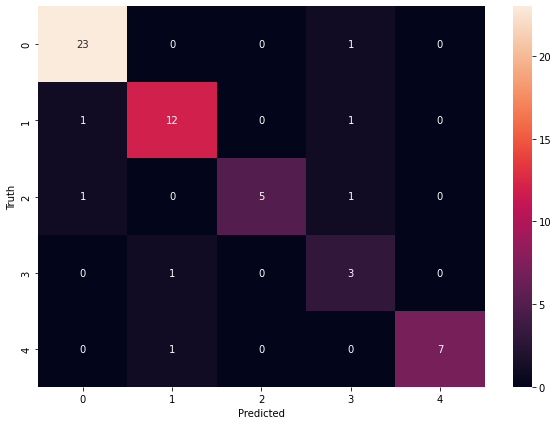

In [432]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [433]:
class_dict

{'Lionel_Messi': 0,
 'Maria_Sharapova': 1,
 'Roger_Federer': 2,
 'Serena_Williams': 3,
 'Virat_Kohli': 4}

#### Save the trained model 

In [434]:
import joblib
joblib.dump(best_clf, 'saved_model.pkl')

['saved_model.pkl']

#### Save the dictionary

In [435]:
import json
with open('class_dictionary.json','w') as f:
    f.write(json.dumps(class_dict))